In [144]:
import hvplot.pandas
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [145]:

#Import economic data
income_data = pd.read_excel("../Resources/Income_data.xlsx")

#import obesity data
obesity_data=pd.read_csv("../Resources/National_Obesity_By_State.csv")

#import state abreviation list
states_abrev=pd.read_csv("../Resources/states.csv") 

In [146]:
#Claning of df
income_data['Median Household Income (2021)']=income_data['Median Household Income (2021)'].str.replace("$",'').fillna(0).str.replace(",",'').astype(float)
income_data.head()

C:\Users\Jacinto\AppData\Local\Temp\ipykernel_5664\876734490.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income_data['Median Household Income (2021)']=income_data['Median Household Income (2021)'].str.replace("$",'').fillna(0).str.replace(",",'').astype(float)


,Unnamed: 0,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median Household Income (2021)
0,NaN,1000,Alabama,6.7,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.6,53990.0
1,NaN,2000,Alaska,6.7,6.3,6.6,6.5,6.0,5.6,8.3,6.4,4.0,78437.0
2,NaN,4000,Arizona,6.8,6.1,5.5,5.0,4.8,4.8,7.8,5.1,3.8,68967.0
3,NaN,5000,Arkansas,5.9,5.0,4.0,3.7,3.7,3.5,6.2,4.1,3.3,52577.0
4,NaN,6000,California,7.6,6.3,5.5,4.8,4.2,4.1,10.1,7.3,4.2,84831.0


In [147]:

income_data_clean=income_data[['Name',2021,'Median Household Income (2021)']]
income_data_clean=income_data_clean.rename(columns={2021: "Unemployment Rate (2021)", "Name": "State"},)

In [148]:
income_data_clean.head(55)

,State,Unemployment Rate (2021),Median Household Income (2021)
0,Alabama,3.4,53990.0
1,Alaska,6.4,78437.0
2,Arizona,5.1,68967.0
3,Arkansas,4.1,52577.0
4,California,7.3,84831.0
5,Colorado,5.4,82228.0
6,Connecticut,6.3,83628.0
7,Delaware,5.5,71636.0
8,District of Columbia,6.8,91072.0
9,Florida,4.6,63054.0


In [149]:
income_data_clean=income_data_clean.merge(obesity_data, how='right', on="State")
income_data_clean=income_data_clean.merge(states_abrev , how='right', on="State")
income_data_clean=income_data_clean.drop(columns=["FID","SHAPE_Length","SHAPE_Area"])
income_data_clean.head()



,State,Unemployment Rate (2021),Median Household Income (2021),Obesity,Abbreviation
0,Alabama,3.4,53990.0,35.6,AL
1,Alaska,6.4,78437.0,29.8,AK
2,Arizona,5.1,68967.0,28.4,AZ
3,Arkansas,4.1,52577.0,34.5,AR
4,California,7.3,84831.0,24.2,CA


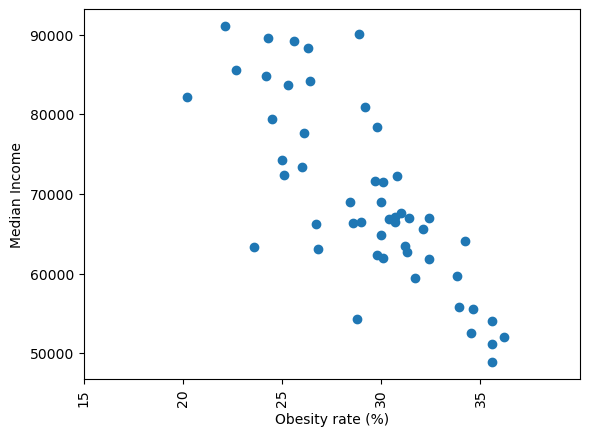

In [152]:
#Now I generate the plots and the regression line to show corelation.
percent=np.arange(15,40,5)
median_inc=income_data_clean['Median Household Income (2021)']
unemployment=income_data_clean['Unemployment Rate (2021)']
obesity=income_data_clean['Obesity']
plt.scatter(obesity,median_inc,)
plt.xlim(20, 40)
plt.xticks(percent, rotation=90)
plt.xlabel('Obesity rate (%)')
plt.ylabel('Median Income')
plt.savefig('../static/Images/Obesity_vs_Income.png', format="png")
plt.show()

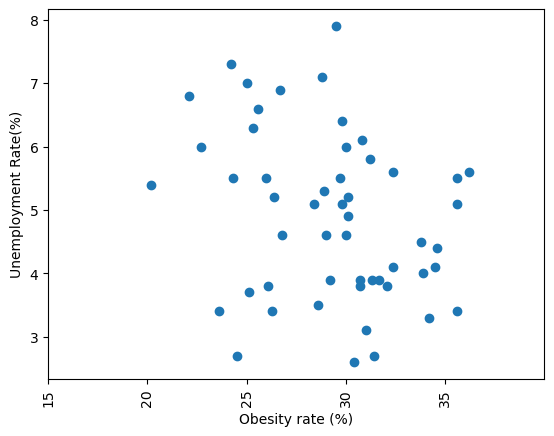

In [151]:
#generate the second plot
percent=np.arange(15,40,5)
plt.scatter(obesity,unemployment)
plt.xlim(20, 40)
plt.xticks(percent, rotation=90)
plt.xlabel('Obesity rate (%)')
plt.ylabel('Unemployment Rate(%)')
plt.savefig('../static/Images/Obesity_vs_Unemployment.png', format="png")
plt.show()


In [103]:
print(f"The correlation coefficient between Obesity and unemployment rate is {round(st.pearsonr(obesity,unemployment)[0],2)}")
print(f"The correlation coefficient between Obesity and unemployment rate is {round(st.pearsonr(obesity,median_inc)[0],2)}")

The correlation coefficient between Obesity and unemployment rate is -0.28


ValueError: array must not contain infs or NaNs

In [141]:
#export files

income_data_clean.to_csv("../Resources/Income_data_and_obesity.csv",
                  encoding="utf-8", index=False, header=True)
income_data_clean.to_json("../Resources/Income_data_and_obesity.json")
